# PURPOSE

In [27]:
'''
use bottom-up approach

- not so appropriate actually, not really looking for clusters, more for nearest neighbours
'''
None

# IMPORTS

In [4]:
%run ipynb_setup.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%run class_Dataset.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GET DATA

In [6]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
'''
 0   title                  1341 non-null   object          TEXT SEARCH
 1   title_orig             1341 non-null   object          TEXT SEARCH
 2   price                  1341 non-null   float64         NEAREST NEIGHBOUR
 3   retail_price           1341 non-null   int64           NEAREST NEIGHBOUR
 4   units_sold             1341 non-null   int64  
 5   rating                 1341 non-null   float64
 6   rating_count           1341 non-null   int64  
 7   rating_five_count      1306 non-null   float64
 8   rating_four_count      1306 non-null   float64
 9   rating_three_count     1306 non-null   float64
 10  rating_two_count       1306 non-null   float64
 11  rating_one_count       1306 non-null   float64
 12  tags                   1341 non-null   object         TEXT SEARCH
 13  product_color          1301 non-null   object         TEXT SEARCH
 14  merchant_rating_count  1341 non-null   int64  
 15  merchant_rating        1341 non-null   float64
 16  product_picture        1341 non-null   object         IMG SEARCH
'''
None

In [46]:
    d.raw.head(1).transpose()

,0
title,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets
title_orig,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets
price,16.0
retail_price,14
currency_buyer,EUR
units_sold,100
uses_ad_boosts,0
rating,3.76
rating_count,54
rating_five_count,26.0


In [43]:
d.df_numeric(
        should_impute_nans       = False,  # rather than trashing entry, populate missing ratings with population mean
        should_log_transform     = False,  # make data distribution more normal like
        should_standard_scale    = False,  # N(0,1) the data
        should_minmax_scale      = False,
        should_minmax_scale_abs  = 2,
        should_pca               = False,  # reduce dimensionality to speed up analysis
        should_pca_components    = 6,    # elbow / eyeballed optimal principal components to use
)

,price,retail_price,units_sold,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,merchant_rating_count,merchant_rating
0,16.00,14,100,3.76,54,26.0,8.0,10.0,1.0,9.0,568,4.128521
1,8.00,22,20000,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,17752,3.899673
2,8.00,43,100,3.57,14,5.0,4.0,2.0,0.0,3.0,295,3.989831
3,8.00,8,5000,4.03,579,295.0,119.0,87.0,42.0,36.0,23832,4.020435
4,2.72,3,100,3.10,20,6.0,4.0,2.0,2.0,6.0,14482,4.001588
...,...,...,...,...,...,...,...,...,...,...,...,...
1565,3.00,8,100,3.79,57,25.0,10.0,13.0,3.0,6.0,4080,3.987990
1567,8.00,7,20000,4.25,3127,1919.0,580.0,304.0,128.0,196.0,16803,4.155032
1568,6.00,9,10000,4.08,1367,722.0,293.0,185.0,77.0,90.0,5316,4.224605
1570,5.00,19,100,3.71,59,24.0,15.0,8.0,3.0,9.0,210,3.961905


In [40]:
d.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1572
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  1341 non-null   object 
 1   title_orig             1341 non-null   object 
 2   price                  1341 non-null   float64
 3   retail_price           1341 non-null   int64  
 4   units_sold             1341 non-null   int64  
 5   rating                 1341 non-null   float64
 6   rating_count           1341 non-null   int64  
 7   rating_five_count      1306 non-null   float64
 8   rating_four_count      1306 non-null   float64
 9   rating_three_count     1306 non-null   float64
 10  rating_two_count       1306 non-null   float64
 11  rating_one_count       1306 non-null   float64
 12  tags                   1341 non-null   object 
 13  product_color          1301 non-null   object 
 14  merchant_rating_count  1341 non-null   int64  
 15  merc

In [3]:
d=Dataset()
d.df_num

,ev0,ev1,ev2,ev3,ev4,ev5
0,-2.001931,1.225439,0.116312,0.236709,1.466243,-0.252100
1,4.439295,-0.213366,1.614180,0.102928,-0.344418,0.346128
2,-3.367202,0.913908,0.561088,0.066624,0.106623,0.993475
3,1.482866,-0.358657,-0.251027,0.101840,-0.101393,-0.657393
4,-2.737343,-2.414666,-0.018018,-1.366523,-0.240100,0.070013
...,...,...,...,...,...,...
1336,-1.883906,-1.435790,-0.520066,0.033993,-0.646946,0.498350
1337,3.467026,-0.402373,-0.607009,0.509966,0.357459,-0.282728
1338,2.438836,-0.580347,-0.706385,0.365528,0.448197,0.521819
1339,-2.100603,-0.301515,0.369377,0.772340,0.069382,1.188141


In [47]:
d.df_num

,ev0,ev1,ev2,ev3,ev4,ev5
0,-2.001931,1.225439,0.116312,0.236709,1.466243,-0.252100
1,4.439295,-0.213366,1.614180,0.102928,-0.344418,0.346128
2,-3.367202,0.913908,0.561088,0.066624,0.106623,0.993475
3,1.482866,-0.358657,-0.251027,0.101840,-0.101393,-0.657393
4,-2.737343,-2.414666,-0.018018,-1.366523,-0.240100,0.070013
...,...,...,...,...,...,...
1336,-1.883906,-1.435790,-0.520066,0.033993,-0.646946,0.498350
1337,3.467026,-0.402373,-0.607009,0.509966,0.357459,-0.282728
1338,2.438836,-0.580347,-0.706385,0.365528,0.448197,0.521819
1339,-2.100603,-0.301515,0.369377,0.772340,0.069382,1.188141


In [51]:
nneighbor = NearestNeighbors(n_neighbors=5)
nneighbor.fit(d.df_num)

distances,indices=nneighbor.kneighbors(d.df_num.loc[[0,1]],n_neighbors=5)
display(distances)
display(indices)

array([[0.     , 0.82713, 1.07994, 1.19435, 1.28092],
       [0.     , 0.95952, 0.99465, 1.27906, 1.31294]])

array([[   0,  244,  934,   42, 1164],
       [   1, 1132,  675,  533, 1315]], dtype=int64)

In [49]:
d.df_num.loc[0]

ev0   -2.001931
ev1    1.225439
ev2    0.116312
ev3    0.236709
ev4    1.466243
ev5   -0.252100
Name: 0, dtype: float64

In [38]:
distances

array([[0.     , 0.82713, 1.07994, 1.19435, 1.28092],
       [0.     , 0.95952, 0.99465, 1.27906, 1.31294],
       [0.     , 1.12267, 1.1881 , 1.2097 , 1.36495],
       ...,
       [0.     , 0.46552, 0.79582, 0.82539, 0.84524],
       [0.     , 1.13905, 1.17317, 1.42607, 1.47398],
       [0.     , 0.6733 , 0.767  , 0.80804, 0.84066]])

In [19]:
indices.shape

array([[   0,  244,  934,   42, 1164],
       [   1, 1132,  675,  533, 1315],
       [   2,  101, 1022,  207,  821],
       ...,
       [1338, 1205, 1210,  568, 1149],
       [1339, 1222, 1215,  443, 1213],
       [1340,  232,  755,  586,  563]], dtype=int64)

In [28]:
d.df_num.shape

(1341, 6)

In [34]:
d.df.loc[809]

title                                                                          ZANZEA Femme Casual Beach Col V Manche Courte Loose Plage Robe Dresse Maxi Plus
title_orig                                                                     ZANZEA Femme Casual Beach Col V Manche Courte Loose Plage Robe Dresse Maxi Plus
price                                                                                                                                                     11.0
retail_price                                                                                                                                                84
units_sold                                                                                                                                                 100
rating                                                                                                                                                    3.46
rating_count                                  

In [32]:
d.df_num.loc[809]

ev0    1.309828
ev1   -0.048207
ev2   -0.529369
ev3    0.186669
ev4   -0.159761
ev5   -0.950964
Name: 809, dtype: float64

In [26]:
indices[3]

array([  3, 824,  57, 510, 809], dtype=int64)

In [27]:
d.get_product_pictures(locs=indices[3])

KeyError: 824

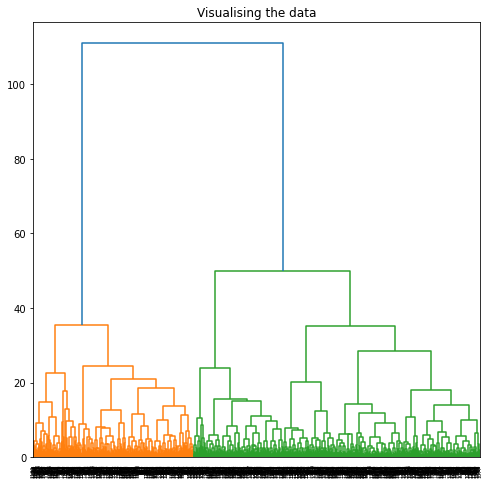

In [9]:
linkage_ward = shc.linkage(d.df_num, method ='ward') # perform clustering with `ward` distance metric

# plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
shc.dendrogram(linkage_ward)

In [13]:
# 
pd.DataFrame(
    linkage_ward,
    columns = ['idx1', 'idx2', 'dist', 'sample_count'],
)

,idx1,idx2,dist,sample_count
0,551.0,732.0,0.136257,2.0
1,1100.0,1165.0,0.161259,2.0
2,54.0,1235.0,0.164446,2.0
3,1292.0,1337.0,0.199422,2.0
4,563.0,586.0,0.206336,2.0
...,...,...,...,...
1335,2664.0,2669.0,28.360560,431.0
1336,2671.0,2676.0,35.063615,590.0
1337,2673.0,2675.0,35.487121,482.0
1338,2674.0,2677.0,49.842188,859.0


In [10]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(linkage_ward, pdist(d.df_num))
c


0.5963282525033745

# REPEAT WITH PIPELINE

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering

### [figure out best `k` to use] Impute + StandardScaler (+ MinMaxScaler)

In [21]:
ac=AgglomerativeClustering(memory='mycachedir',compute_full_tree=True)

In [22]:
ac.fit(d.df_num)

AgglomerativeClustering(compute_full_tree=True, memory='mycachedir')

In [23]:
pd.Series(ac.labels_).unique()

array([1, 0], dtype=int64)

In [25]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(d.df_num)
labels = model.labels_

In [26]:
pd.Series(labels).value_counts()

0    431
1    348
2    269
4    159
3    134
dtype: int64